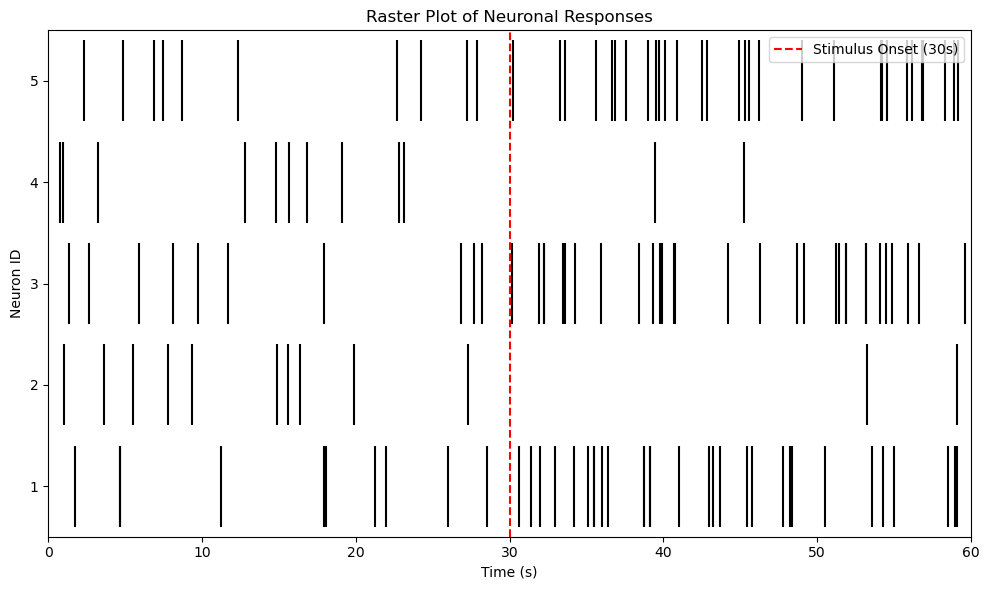

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_neurons = 5  # Total neurons
baseline_rate = 10 / 30  # Baseline firing rate (spikes/sec)
stim_start = 30  # Stimulus start time in seconds
stim_end = 60  # Stimulus end time in seconds
total_time = 60  # Total time (seconds)
magnitude_excitation = 3  # Excitation multiplier
magnitude_inhibition = 0.3  # Inhibition multiplier

# Generate spike times for each neuron
spike_times = []
np.random.seed(42)  # For reproducibility
for neuron_id in range(1, num_neurons + 1):
    # Baseline spikes
    baseline_spikes = np.sort(np.random.uniform(0, stim_start, int(baseline_rate * stim_start)))
    
    # Response to stimulus
    if neuron_id % 2 == 0:  # Even neurons (inhibited)
        stim_rate = baseline_rate * magnitude_inhibition
    else:  # Odd neurons (excited)
        stim_rate = baseline_rate * magnitude_excitation
    
    stim_spikes = np.sort(np.random.uniform(stim_start, stim_end, int(stim_rate * (stim_end - stim_start))))
    
    # Combine spikes
    all_spikes = np.concatenate((baseline_spikes, stim_spikes))
    spike_times.append(all_spikes)

# Create raster plot
fig, ax = plt.subplots(figsize=(10, 6))
for neuron_id, spikes in enumerate(spike_times, start=1):
    ax.vlines(spikes, neuron_id - 0.4, neuron_id + 0.4, color='black')

# Add stimulus line
ax.axvline(stim_start, color='red', linestyle='--', label='Stimulus Onset (30s)')

# Format plot
ax.set_xlabel('Time (s)')
ax.set_ylabel('Neuron ID')
ax.set_title('Raster Plot of Neuronal Responses')
ax.set_xlim(0, total_time)
ax.set_ylim(0.5, num_neurons + 0.5)
ax.legend()
plt.tight_layout()
plt.show()